In [5]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.compute as pc
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
from multiprocessing import Pool
import json
from source import *
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

import scienceplots

plt.style.use(['science','ieee'])

In [6]:
Bs_m = 5.36693

In [7]:
dataset = ds.dataset("sig_data/merged.parquet", format="parquet")

In [8]:
scanner = dataset.scanner(batch_size=100_000)
for batch in scanner.to_batches():
    table = pa.Table.from_batches([batch])
    display(table.to_pandas().columns)
    break
del scanner

Index(['__experiment__', '__run__', '__event__', '__production__',
       '__candidate__', '__ncandidates__', '__weight__', 'N_KL', 'idec0',
       'idec1', 'totalEnergyMC', 'E_gamma_in_ROE', 'Bs_lik', 'is0',
       'Miss_id_0', 'Miss_id_1', 'missedE', 'M0', 'p0', 'recM2', 'p_tau_0',
       'p_tau_1', 'tau_d_0_0', 'tau_d_1_0', 'tau_last_z_0', 'tau_last_r_0',
       'tau_last_z_1', 'tau_last_r_1', 'correct_nu_0', 'correct_nu_1',
       'correct_gamma_0', 'correct_gamma_1', 'lost_0', 'lost_1',
       'PID_self_vs_0_tau0', 'PID_self_vs_1_tau0', 'PID_self_vs_2_tau0',
       'PID_self_vs_4_tau0', 'PID_self_vs_0_tau1', 'PID_self_vs_1_tau1',
       'PID_self_vs_2_tau1', 'PID_self_vs_4_tau1'],
      dtype='object')

In [9]:
mask = (pc.field("E_gamma_in_ROE") < 1.2) & (pc.field("is0") == 1) & (pc.field("Bs_lik") > 0.0012) &  (pc.field("M0") > 5.347) &  (pc.field("M0") < 5.387) 
mask0 = (pc.field("E_gamma_in_ROE") < 1.2) & (pc.field("is0") == 0) & (pc.field("Bs_lik") > 0.0012) &  (pc.field("M0") > 5.347) &  (pc.field("M0") < 5.387)
mask_is1 = pc.field("correct_nu_0") & pc.field("correct_nu_1") & pc.field("correct_gamma_0") & pc.field("correct_gamma_1") & pc.field("lost_0") & pc.field("lost_1") & pc.field("Miss_id_0") & pc.field("Miss_id_1")
mask_is0 = pc.field("is0") == 1
mask_lep = ((pc.field("idec0") == 0) | (pc.field("idec0") == 1)) & ((pc.field("idec1") == 0) | (pc.field("idec1") == 1))

In [10]:
decay_mod_tau = ["$e^+ \\nu_e \\bar \\nu_\\tau$", "$\mu^+ \\nu_\\mu \\bar \\nu_\\tau$", "$\\pi^+ \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\pi^0) \\bar \\nu_\\tau$", "$\\pi^+ \\pi^+ \\pi^- \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\gamma) \\bar \\nu_\\tau$"]

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_15577/1033810642.py:1: SyntaxWarning: invalid escape sequence '\m'
  decay_mod_tau = ["$e^+ \\nu_e \\bar \\nu_\\tau$", "$\mu^+ \\nu_\\mu \\bar \\nu_\\tau$", "$\\pi^+ \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\pi^0) \\bar \\nu_\\tau$", "$\\pi^+ \\pi^+ \\pi^- \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\gamma) \\bar \\nu_\\tau$"]


In [11]:
wbin = 0.2
a = 0
b = 5
bins = np.linspace(a, b, int((b-a)/wbin))

In [ ]:
bin_centers, counts, N = compute_histogram(dataset, bins, "missedE", filter_mask=mask_is1 & mask)


fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

ax.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o', label="Data")

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}\\,\\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_\mathrm{miss} \; (\mathrm{GeV})$')
ax.set_title("")
ax.legend(title=f"$N = {N}$")


plt.tight_layout()
plt.show()

/tmp/ipykernel_11350/3263174918.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


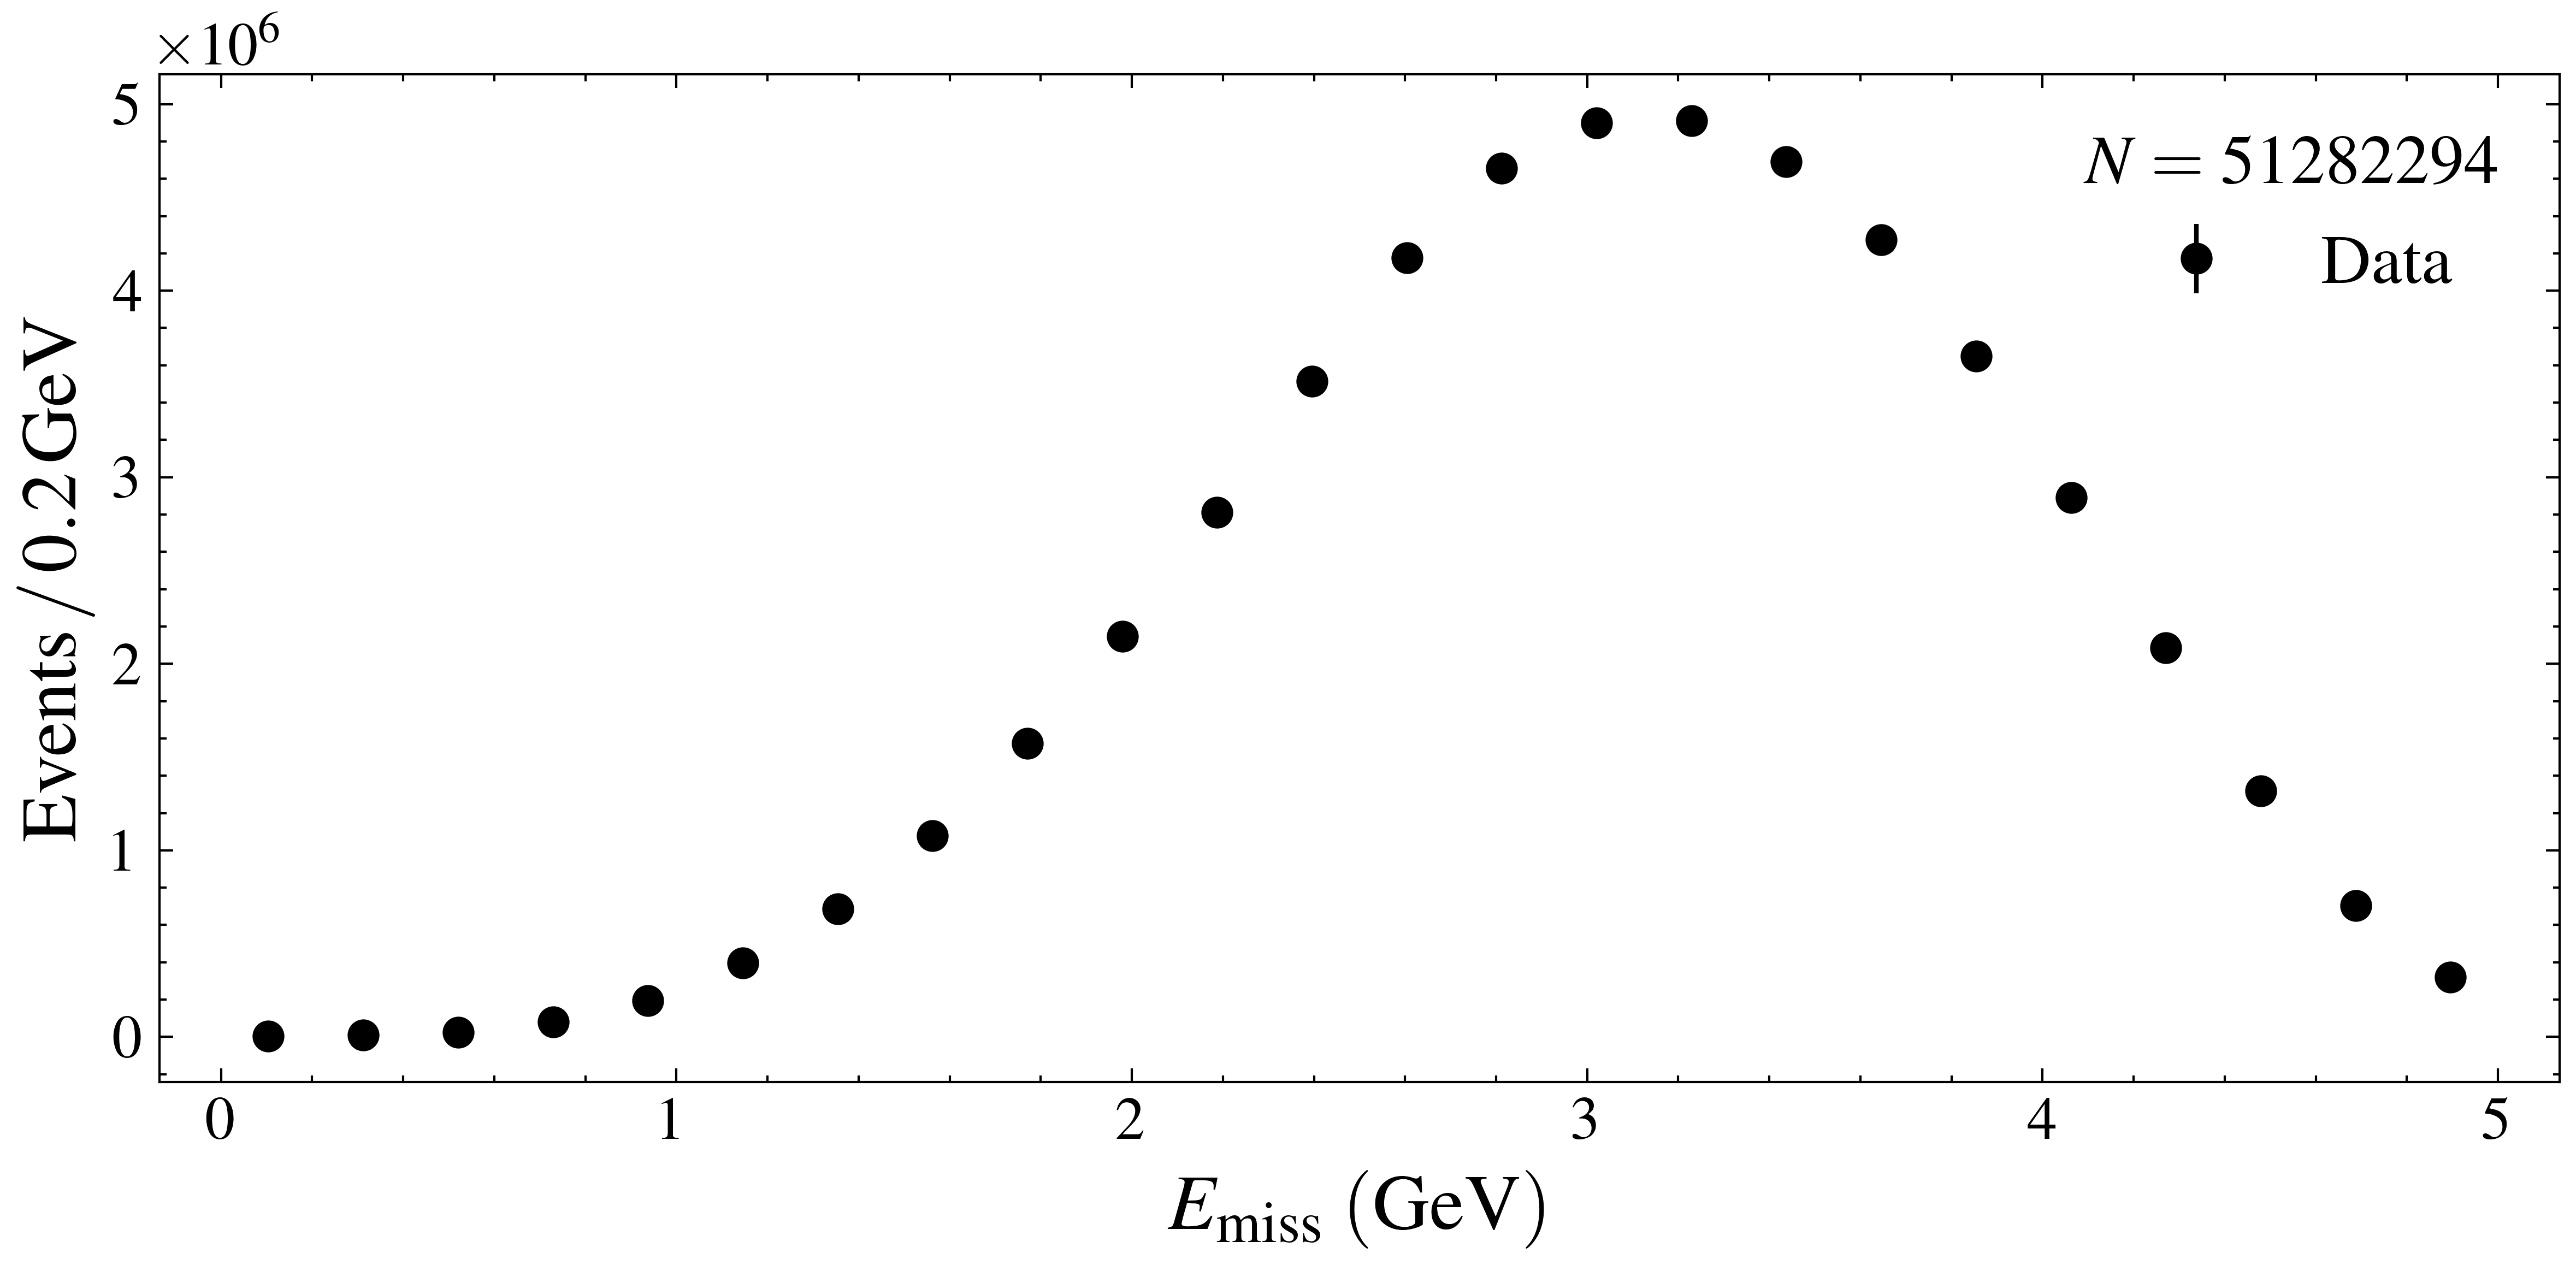

In [ ]:
bin_centers, counts, N = compute_histogram(dataset, bins, "missedE", filter_mask=mask_is0  & mask)


fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

ax.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o', label="Data")

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}\\,\\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_\mathrm{miss} \; (\mathrm{GeV})$')
ax.set_title("")
ax.legend(title=f"$N = {N}$")

plt.tight_layout()
plt.show()

/tmp/ipykernel_8681/4216748683.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


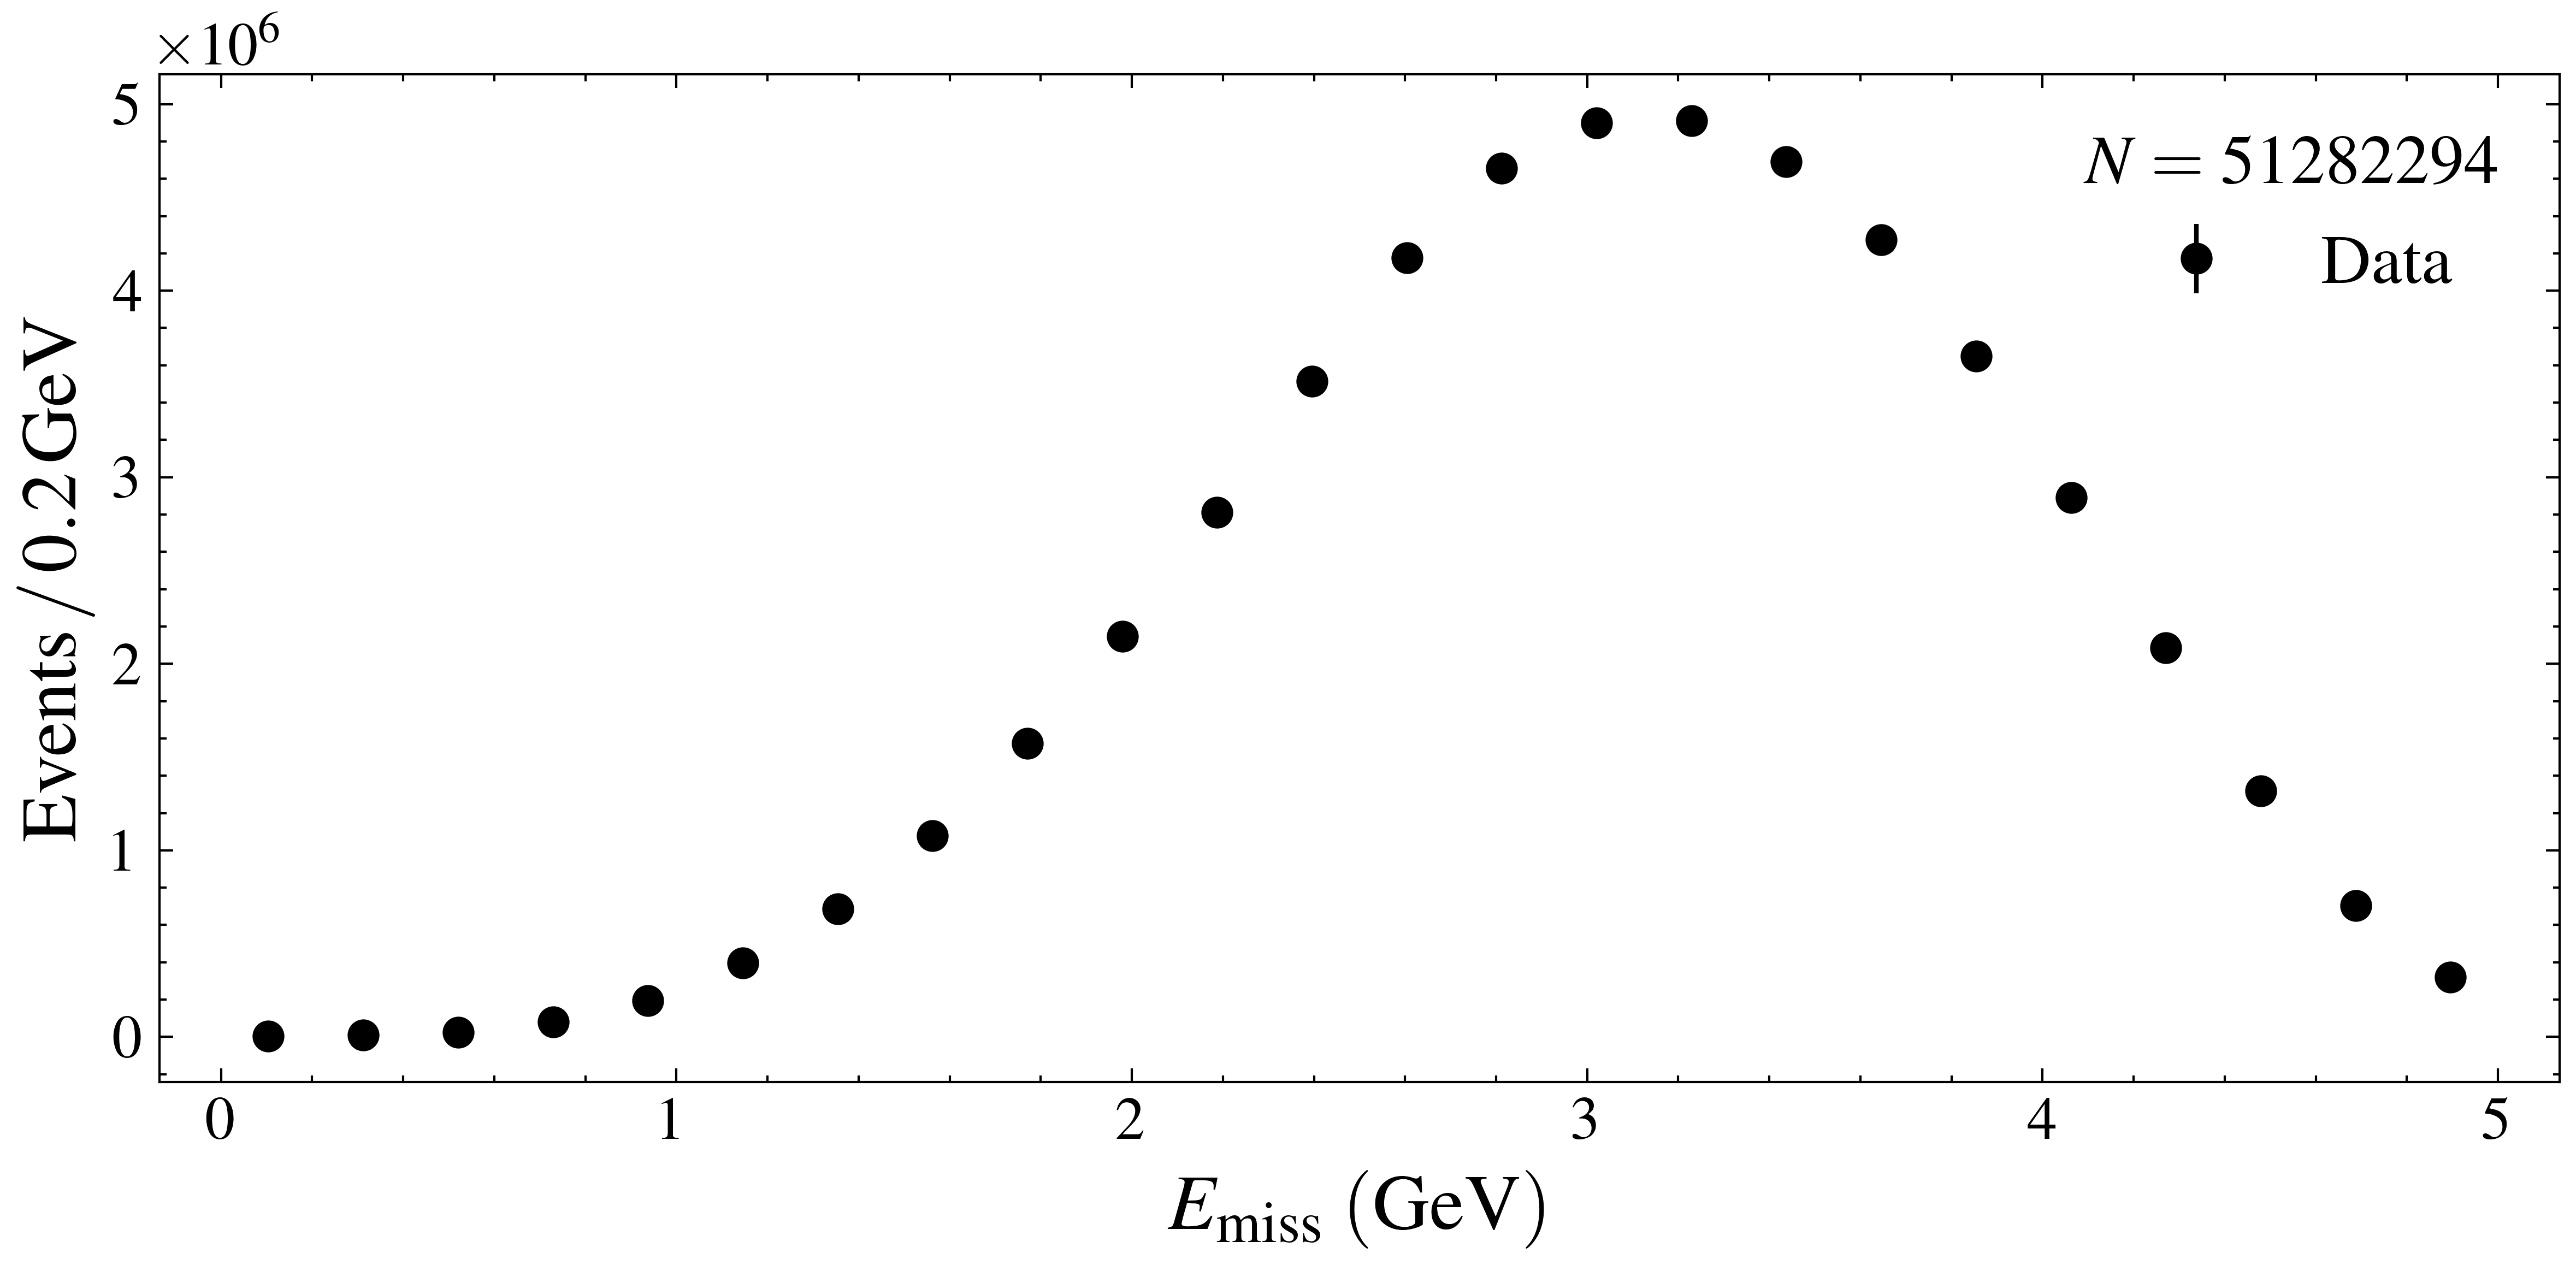

In [ ]:
bin_centers, counts, N = compute_histogram(dataset, bins, "missedE", filter_mask= mask)


fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

ax.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o', label="Data")

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}\\,\\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_\mathrm{miss} \; (\mathrm{GeV})$')
ax.set_title("")
ax.legend(title=f"$N = {N}$")

plt.tight_layout()
plt.show()

In [ ]:
wbin = 0.2
a = 0
b = 10
bins = np.linspace(a, b, int((b-a)/wbin))

/tmp/ipykernel_8681/3075491157.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


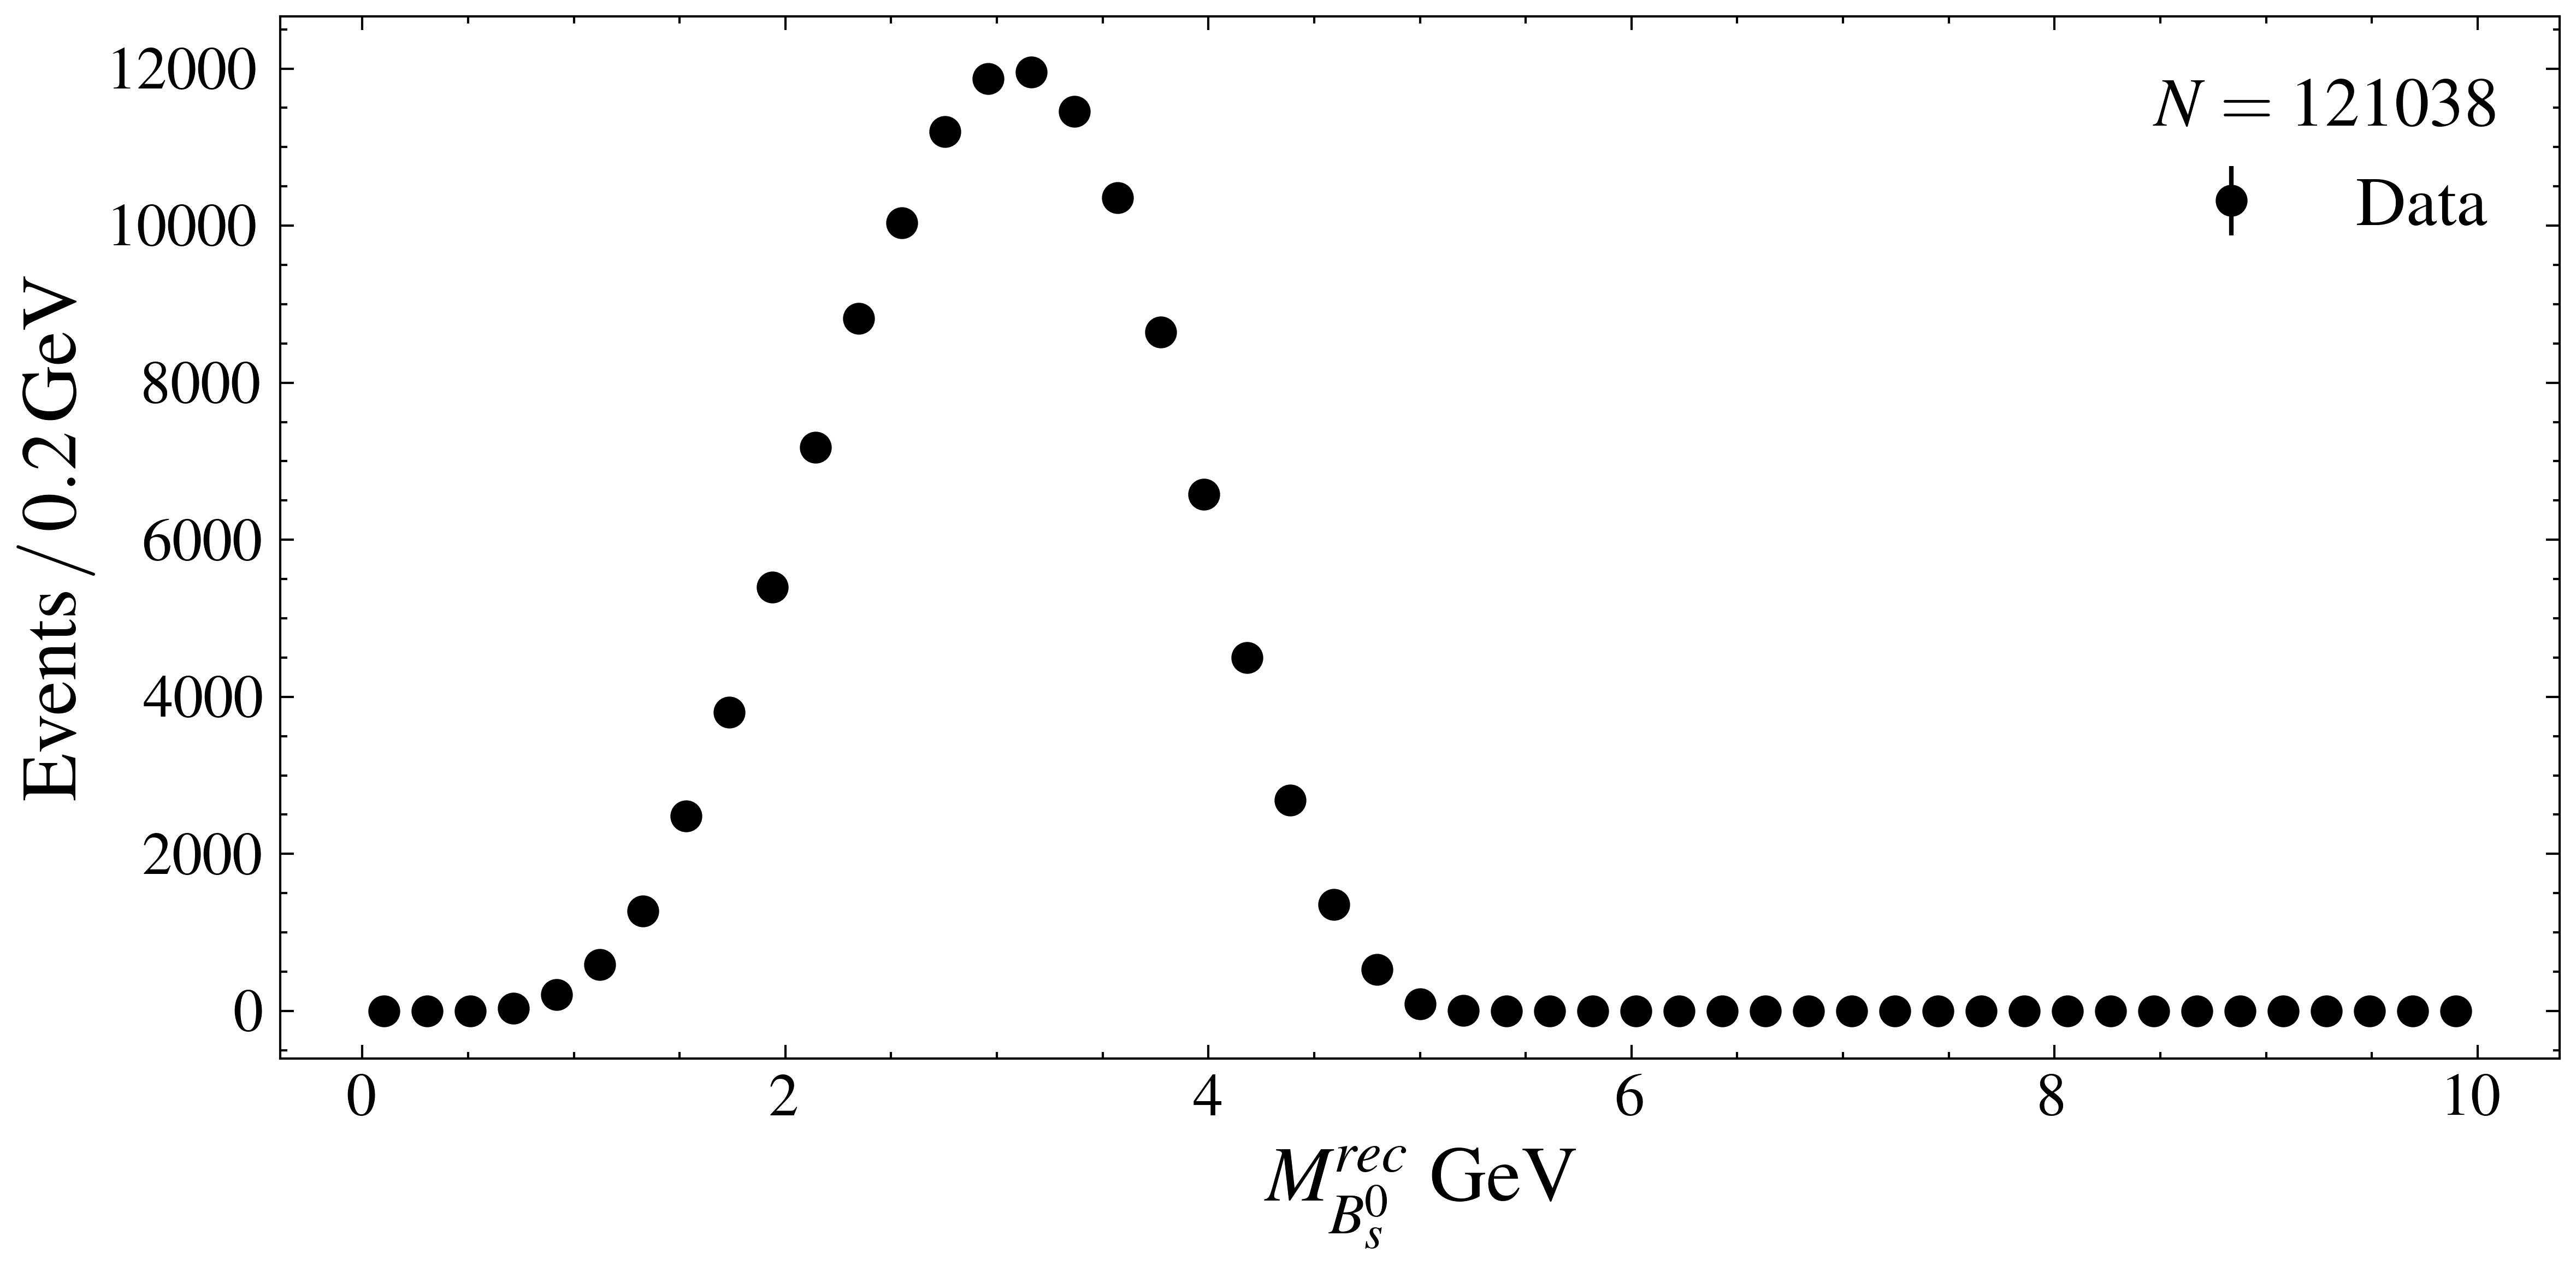

In [ ]:
bin_centers, counts, N = compute_histogram(dataset, bins, "recM2", fun=lambda x: np.sqrt(x), filter_mask= mask & mask_is0 & mask_is1 & mask_lep)


fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

ax.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o', label="Data")

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}\\,\\mathrm{{GeV}}$')
ax.set_xlabel(r'$M^{rec}_{B_s^0} \ \mathrm{GeV}$')
ax.set_title("")
ax.legend(title=f"$N = {N}$")

plt.tight_layout()
plt.show()

In [ ]:
wbin = 0.05
a = 0
b = 1.2
bins = np.linspace(a, b, int((b-a)/wbin))

/tmp/ipykernel_8681/997772634.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


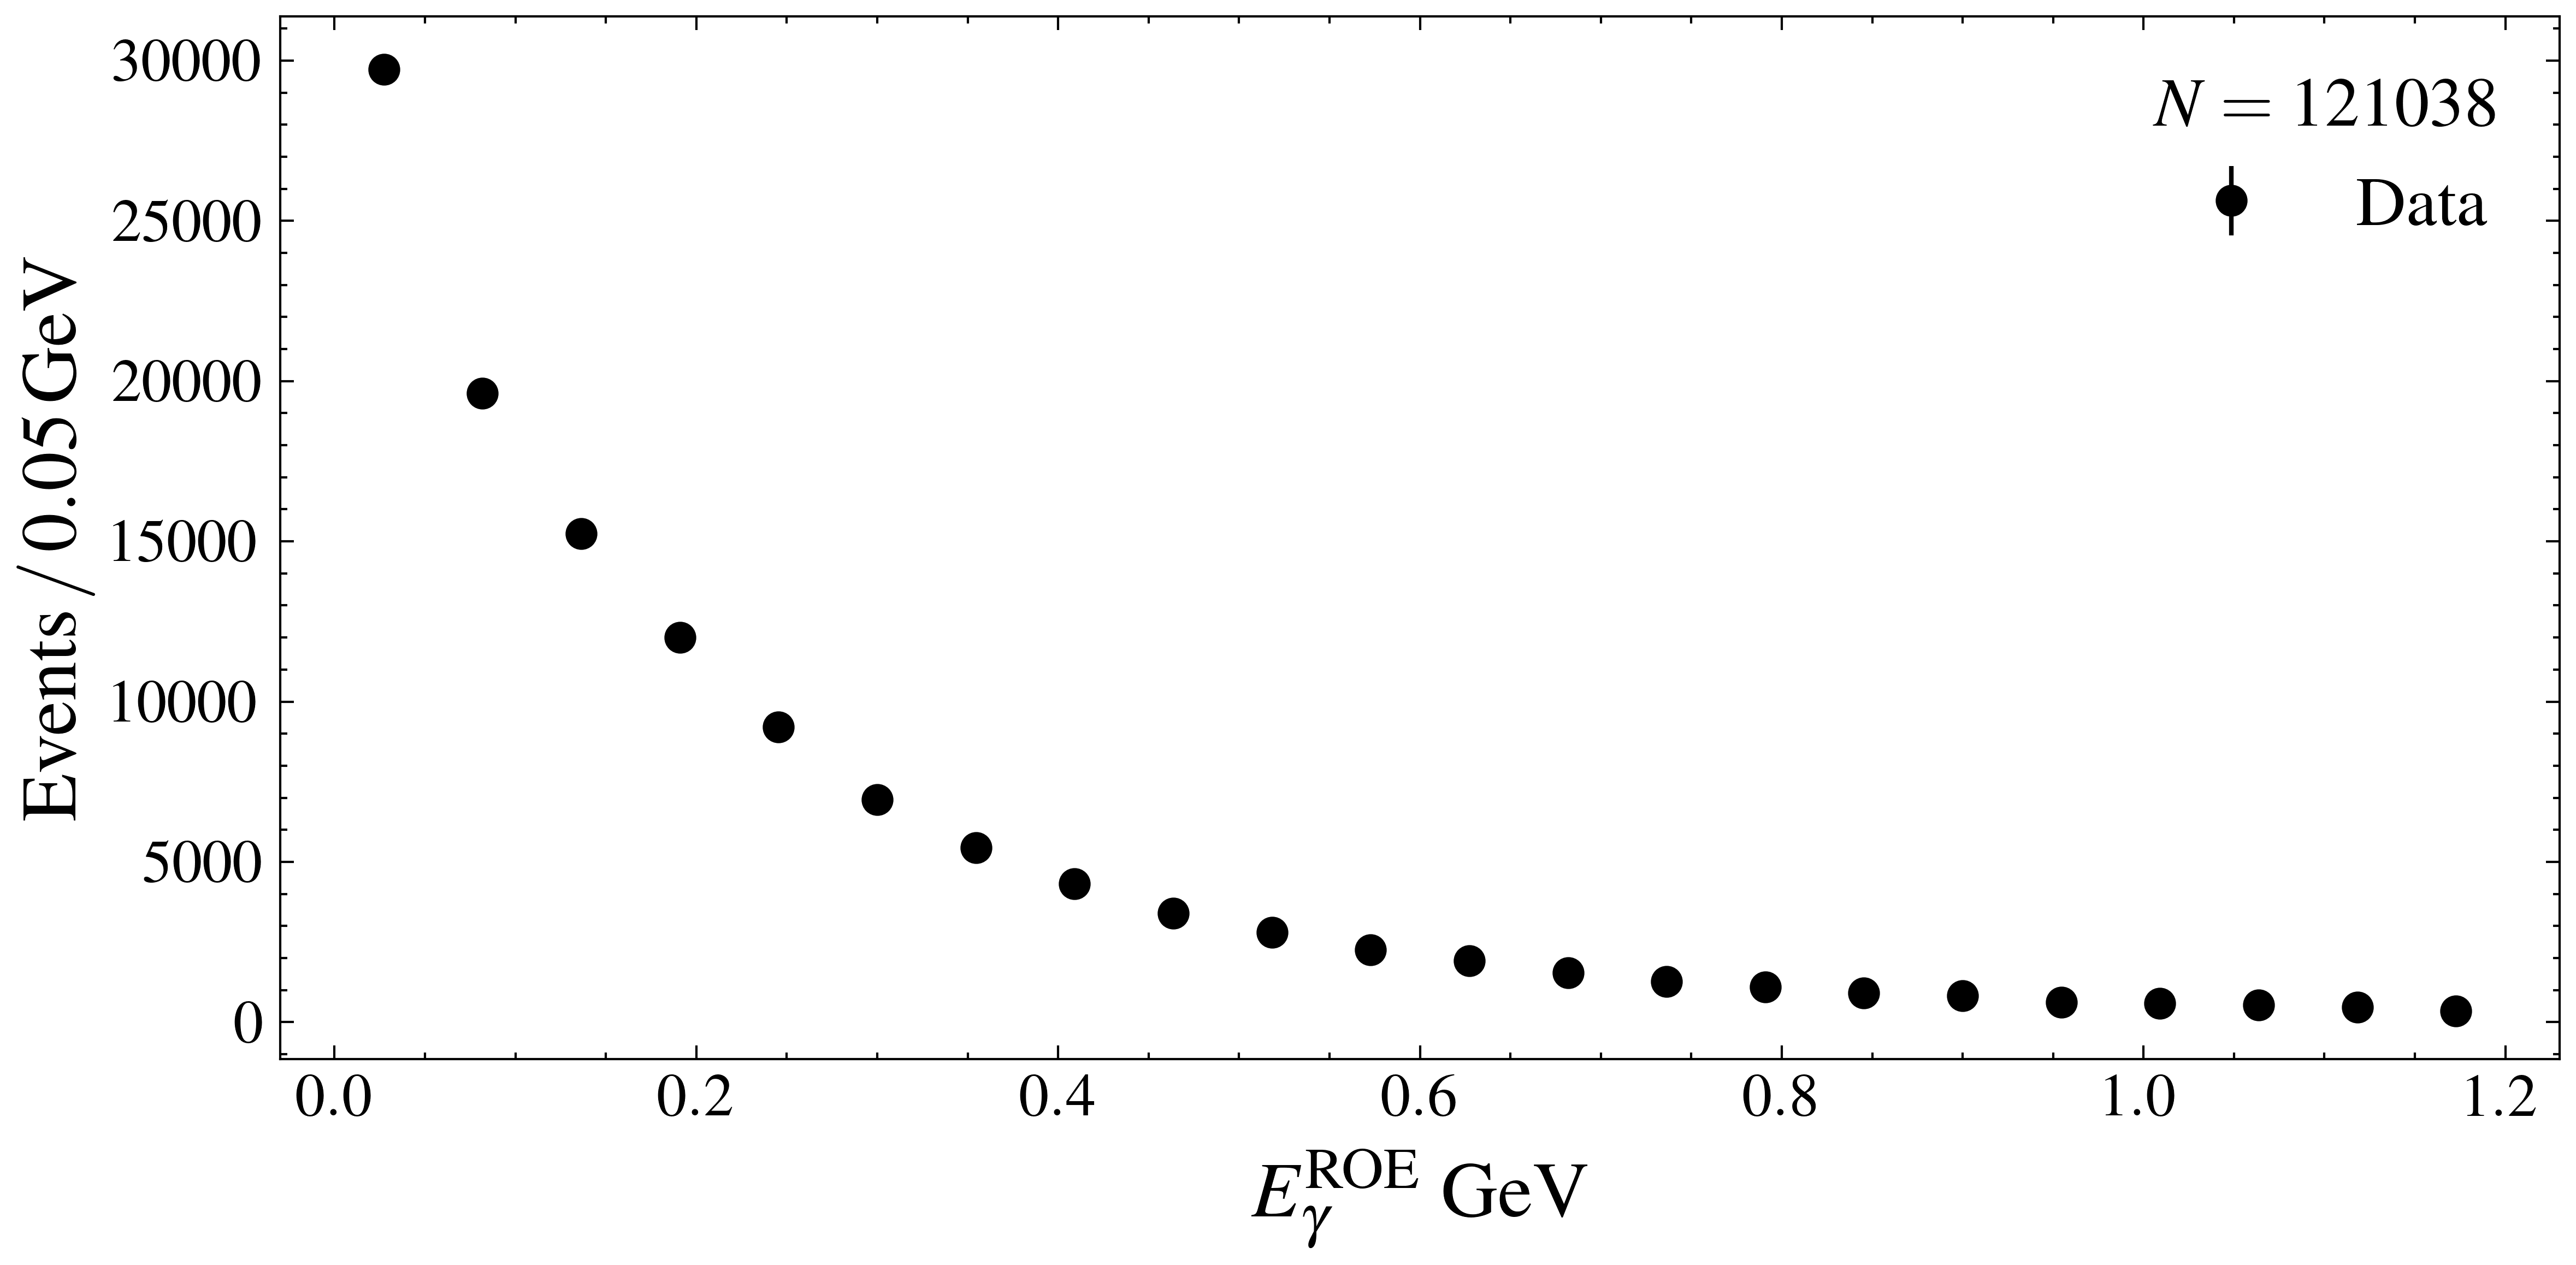

In [ ]:
bin_centers, counts, N = compute_histogram(dataset, bins, "E_gamma_in_ROE", filter_mask= mask & mask_is0 & mask_is1 & mask_lep)


fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

ax.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o', label="Data")
ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}\\,\\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_{\gamma}^\mathrm{ROE} \ \mathrm{GeV}$')
ax.set_title("")
ax.legend(title=f"$N = {N}$")

plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

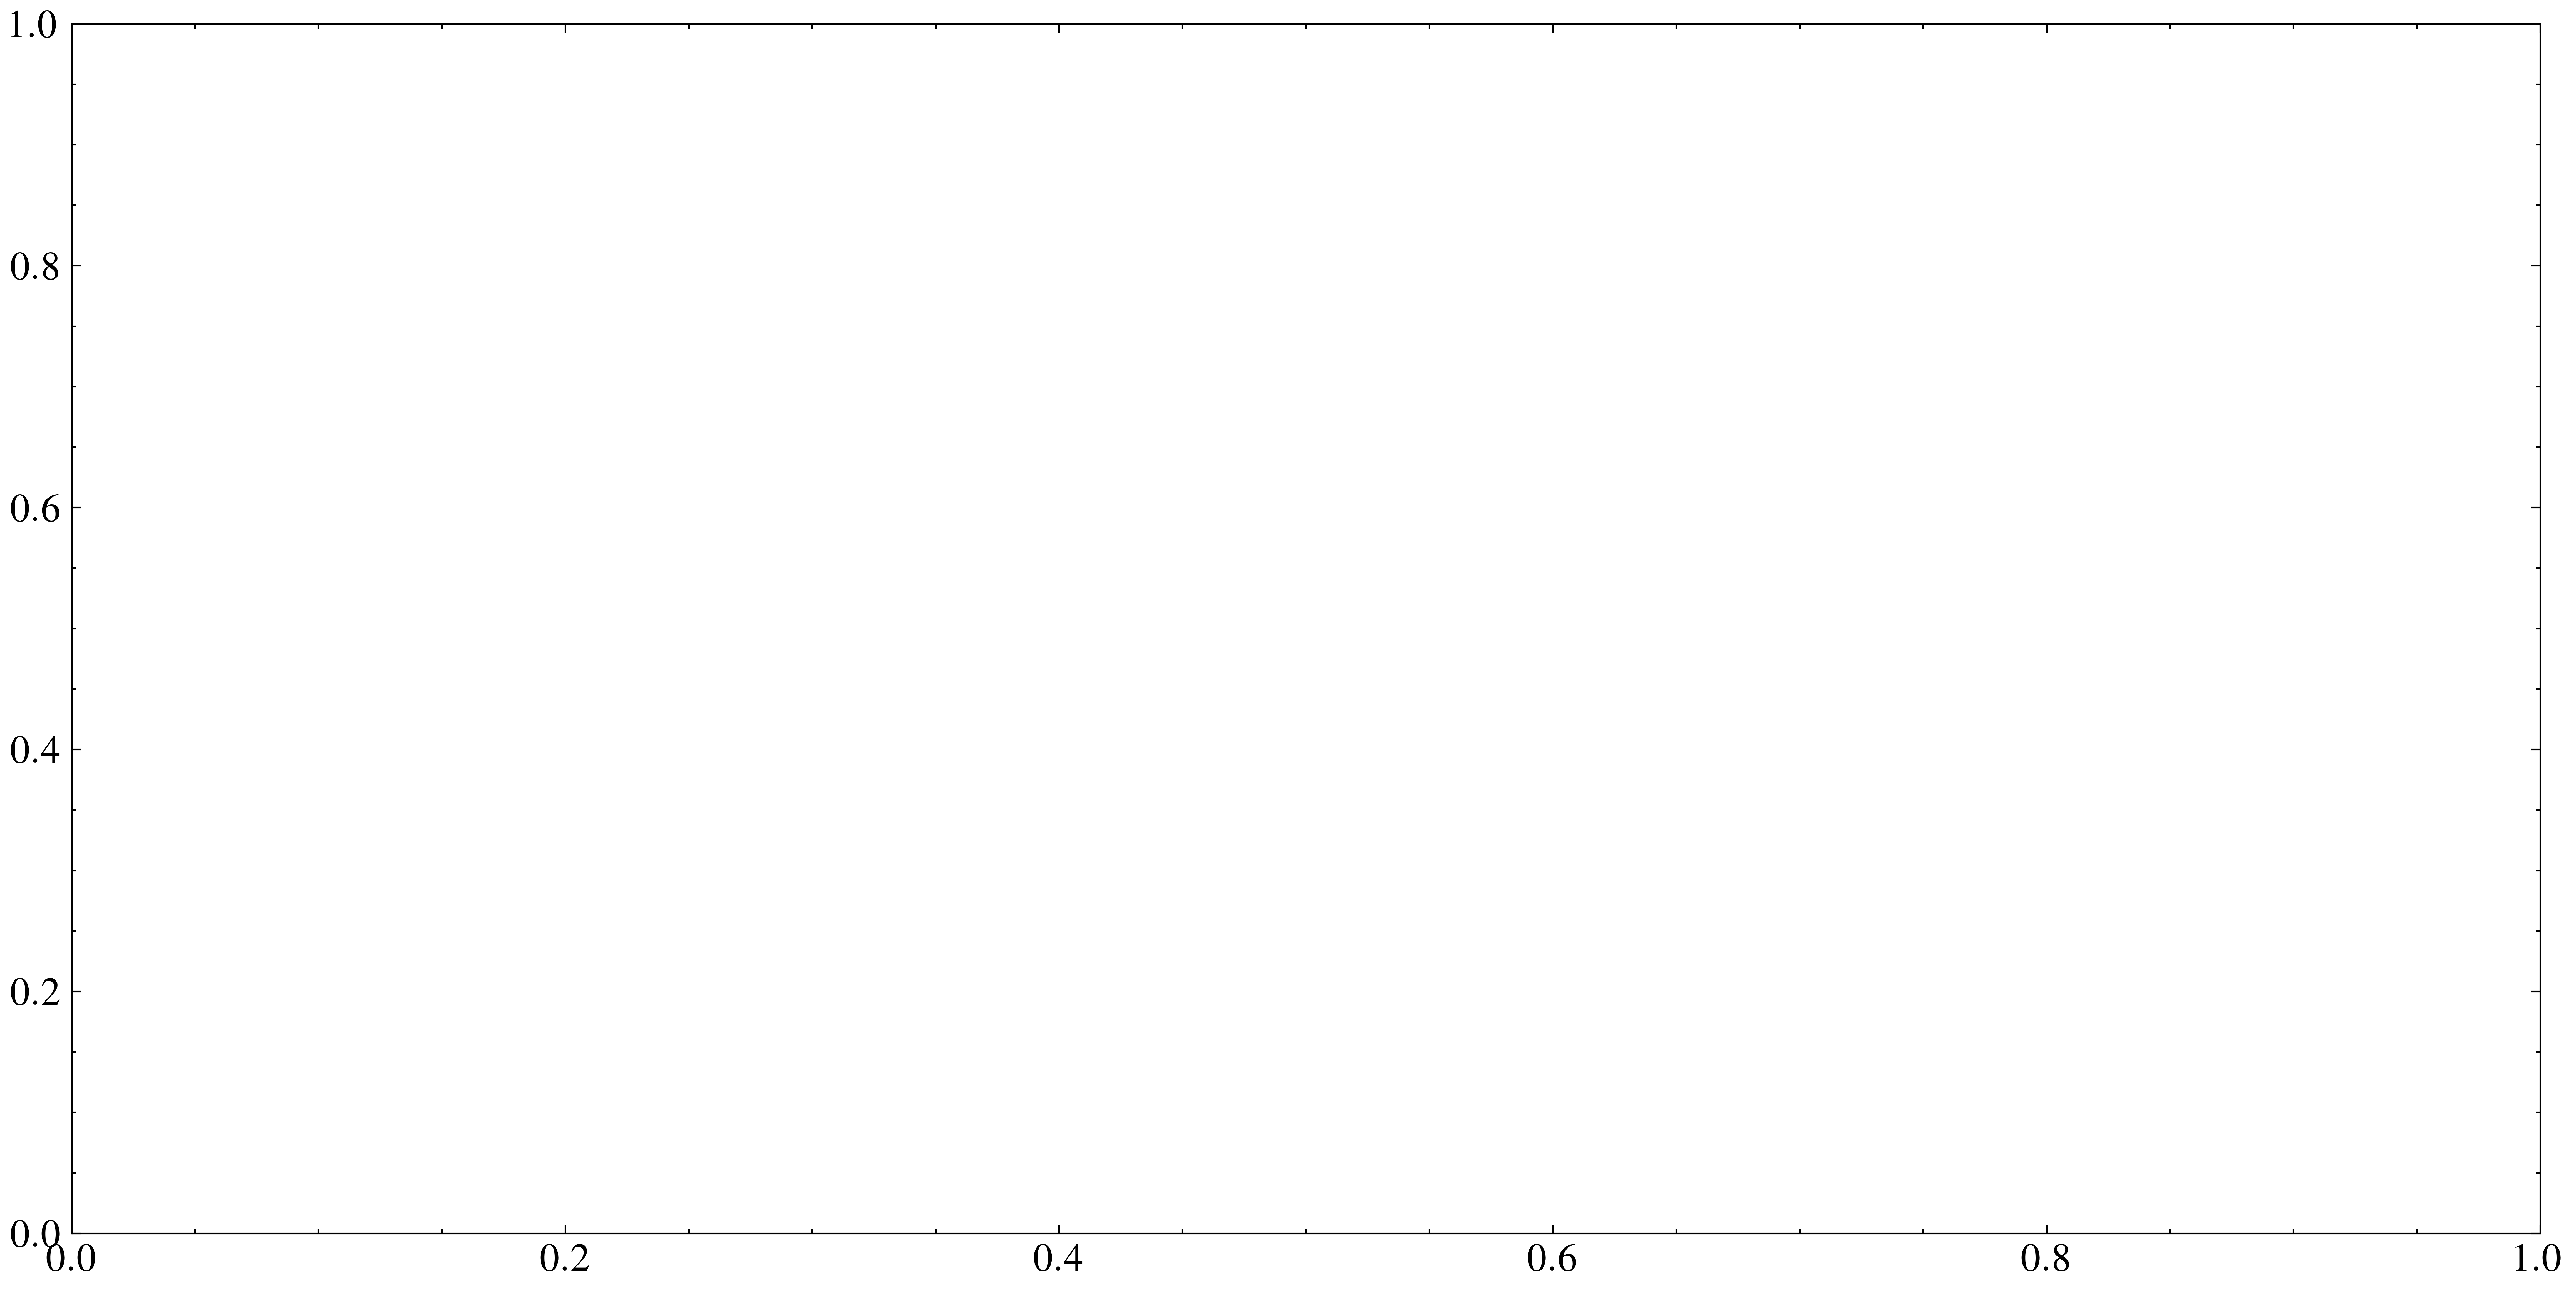

In [ ]:
fig, axs = plt.subplots(1, figsize=(12, 12/2))
ax = axs
dat = data[(data.N_tracks_in_ROE == 0) & (data.is1 == 1) & (data.is0 == 1)]
N = dat.shape[0]
counts, bin_centers = errorhist(dat.E_gamma_in_ROE, bins = bins , axs = ax, label="Data")
ax.set_title("")   
ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
ax.legend(title=f"$N = {dat.shape[0]}$")
ax.grid()

plt.show()

In [ ]:
wbin = 0.2
a = 0
b = 6
bins = np.linspace(a, b, int((b-a)/wbin))

In [ ]:
bord = dict()
fig, axs = plt.subplots(6, 6, figsize=(10*1.6*3, 10*3), sharex=True)
for ind_i, i in enumerate([0, 1, 2, 3, 4, 5]):
    for ind_j, j in enumerate([0, 1, 2, 3, 4, 5]):
        if j > i: continue
        ax = axs[ind_i, ind_j]
        dat = data[mask & (data.is1 == 1)  & (((data.idec0 == i) & (data.idec1 == j)) | ((data.idec0 == j) & (data.idec1 == i)))]
        counts, bin_centers = errorhist(dat.missedE, bins = bins , axs = ax, label=r"$\mathrm{Data}$")

        # Вычислим среднее и стандартное отклонение
        mean_val = np.mean(dat.missedE)
        std_val = np.std(dat.missedE)

        # Добавим вертикальные линии
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'$\\mu , \\ \\mu = {mean_val:.2f}$')
        ax.axvline(mean_val - 2*std_val, color='blue', linestyle=':', linewidth=1.5, label=f'$\\mu \\pm 2\\sigma, \\ \\sigma = {std_val:.2f}$')
        ax.axvline(mean_val + 2*std_val, color='blue', linestyle=':', linewidth=1.5)
        bord [f"{i}{j}"] = (mean_val - 2*std_val, mean_val + 2*std_val)
        bord[f"{j}{i}"] = (mean_val - 2*std_val, mean_val + 2*std_val)
        ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
        ax.set_xlabel(r'$E_{miss} \ GeV$')
        ax.legend(title=f"$N = {dat.shape[0]}$ \n $\\tau_1 \\to ${decay_mod_tau[i]} \n $\\tau_2 \\to ${decay_mod_tau[j]}")

for ax, row in zip(axs[:,0], decay_mod_tau):
    ax.annotate(row, xy=(-0.2, 0.5), xycoords='axes fraction',
                ha='right', va='center', fontsize=35, rotation=90, fontweight='bold')

for ax, col in zip(axs[0], decay_mod_tau):
    ax.annotate(col, xy=(0.5, 1.1), xycoords='axes fraction',
                ha='center', va='bottom', fontsize=35, fontweight='bold')

json_object = json.dumps(bord, indent=4)
with open("output/E_miss_bord.json", "w") as outfile:
    outfile.write(json_object)


plt.savefig(f"output/E_miss_tau_chan_s1_1.pdf", dpi=300, bbox_inches="tight", transparent=False)
plt.show()


In [ ]:
bord = dict()
fig, axs = plt.subplots(5, 5, figsize=(10*1.6*3, 10*3), sharex=True)
for ind_i, i in enumerate([0, 1, 2, 3, 4]):
    for ind_j, j in enumerate([0, 1, 2, 3, 4]):
        if j > i: continue
        ax = axs[ind_i, ind_j]
        dat = data[mask & (((data.idec0 == i) & (data.idec1 == j)) | ((data.idec0 == j) & (data.idec1 == i)))]
        counts, bin_centers = errorhist(dat.missedE, bins = bins , axs = ax, label=r"$\mathrm{Data}$")

        # Вычислим среднее и стандартное отклонение
        mean_val = np.mean(dat.missedE)
        std_val = np.std(dat.missedE)

        # Добавим вертикальные линии
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'$\\mu , \\ \\mu = {mean_val:.2f}$')
        ax.axvline(mean_val - 2*std_val, color='blue', linestyle=':', linewidth=1.5, label=f'$\\mu \\pm 2\\sigma, \\ \\sigma = {std_val:.2f}$')
        ax.axvline(mean_val + 2*std_val, color='blue', linestyle=':', linewidth=1.5)
        bord [f"{i}{j}"] = (mean_val - 2*std_val, mean_val + 2*std_val)
        bord[f"{j}{i}"] = (mean_val - 2*std_val, mean_val + 2*std_val)
        ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
        ax.set_xlabel(r'$E_{miss} \ GeV$')
        ax.legend(title=f"$N = {dat.shape[0]}$ \n $\\tau_1 \\to ${decay_mod_tau[i]} \n $\\tau_2 \\to ${decay_mod_tau[j]}")

for ax, row in zip(axs[:,0], decay_mod_tau):
    ax.annotate(row, xy=(-0.1, 0.5), xycoords='axes fraction',
                ha='right', va='center', fontsize=35, rotation=90, fontweight='bold')

for ax, col in zip(axs[0], decay_mod_tau):
    ax.annotate(col, xy=(0.5, 1.1), xycoords='axes fraction',
                ha='center', va='bottom', fontsize=35, fontweight='bold')

json_object = json.dumps(bord, indent=4)
with open("output/E_miss_bord.json", "w") as outfile:
    outfile.write(json_object)


plt.savefig(f"output/E_miss_tau_chan_s1_1.pdf", dpi=300, bbox_inches="tight", transparent=False)
plt.show()


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

neutrino_count = [2, 2, 1, 1]
grouped_pairs = {4: [], 3: [], 2: []}

for i in range(4):
    for j in range(i+1):
        total_nu = neutrino_count[i] + neutrino_count[j]
        grouped_pairs[total_nu].append((i, j))

for nu_sum, pairs in grouped_pairs.items():
    with PdfPages(f"output/E_miss_tau_{nu_sum}nu.pdf") as pdf:
        for i, j in pairs:
            fig, ax = plt.subplots(figsize=(12*0.9, 10*0.9))
            dat = data[mask & (data.is1 == 1) & (
                ((data.idec0 == i) & (data.idec1 == j)) |
                ((data.idec0 == j) & (data.idec1 == i))
            )]
            counts, bin_centers = errorhist(dat.missedE, bins=bins, axs=ax, label=r"$\mathrm{Data}$")

            mean_val = np.mean(dat.missedE)
            std_val = np.std(dat.missedE)

            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'$\\mu = {mean_val:.2f}$')
            ax.axvline(mean_val - 3*std_val, color='blue', linestyle=':', linewidth=1.5, label=f'$\\pm 3\\sigma, \\sigma = {std_val:.2f}$')
            ax.axvline(mean_val + 3*std_val, color='blue', linestyle=':', linewidth=1.5)

            ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
            ax.set_xlabel(r'$E_{{miss}} \ \mathrm{{GeV}}$')
            ax.legend(title=f"$N = {dat.shape[0]}$\n$\\tau_1 \\to$ {decay_mod_tau[i]} \n$\\tau_2 \\to$ {decay_mod_tau[j]}")
            ax.grid()
            fig.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)


In [ ]:
wbin = 0.2
a = 0
b = 6
bins = np.linspace(a, b, int((b-a)/wbin))

In [ ]:
fig, axs = plt.subplots(1, figsize=(12, 12/2))
ax = axs
dat = data[(data.N_tracks_in_ROE == 0) & (data.Miss_id_0 == 1) & (data.Miss_id_1 == 1) & (data.is0 == 1) & (data.idec0 == 1) & (data.idec1 == 1)]
N = dat.shape[0]
counts, bin_centers = errorhist(dat.p_td, bins = bins , axs = ax, label="Data")
ax.set_title("")   
ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_{\\gamma}^{ROE} \ GeV$')
ax.legend(title=f"$N = {dat.shape[0]}$")
ax.grid()

plt.show()
print(dat[dat["p_td"] > 1].shape[0], dat[dat["p_td"] < 1].shape[0] )

In [ ]:
fig, axs = plt.subplots(1, figsize=(12, 12/2))
ax = axs
dat = data[(data.N_tracks_in_ROE == 0) & (data.is1 == 1) & (data.is0 == 1) & (data.idec0 == 0) & (data.idec1 == 0)]
N = dat.shape[0]
counts, bin_centers = errorhist(dat.p_td, bins = bins , axs = ax, label="Data")
ax.set_title("")   
ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_{\\gamma}^{ROE} \ GeV$')
ax.legend(title=f"$N = {dat.shape[0]}$")
ax.grid()

plt.show()
print(dat[dat["p_td"] > 1].shape[0], dat[dat["p_td"] < 1].shape[0] )

In [ ]:
fig, axs = plt.subplots(1, figsize=(12, 12/2))
ax = axs
dat = data[mask & (data.is0 == 1) & (((data.idec0 < 5) & (data.idec1 == 5)) | ((data.idec0 == 5) & (data.idec1 < 5)))]
N = dat.shape[0]
counts, bin_centers = errorhist(dat.missedE, bins = bins, axs = ax, label="Data")
ax.set_title("")   
ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_{miss} \ GeV$')
ax.legend(title=f"$N = {dat.shape[0]}$")
ax.grid()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(12, 12/2))
ax = axs
dat = data[mask & (data.is1 == 1) & (data.idec0 == 5) & (data.idec1 == 5)]
N = dat.shape[0]
counts, bin_centers = errorhist(dat.missedE, bins = bins, axs = ax, label="Data")
ax.set_title("")
ax.set_ylabel(f'$\\mathrm{{Events}}| {wbin} \\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_{miss} \ GeV$')
ax.legend(title=f"$N = {dat.shape[0]}$")
ax.grid()
plt.show()